In [ ]:
!pip install playwright openai pandas matplotlib plotly nest_asyncio
!playwright install


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 19.3 MB/s eta 0:00:00
172.5 MiB [] 0% 0.0s172.5 MiB [] 0% 47.7s172.5 MiB [] 0% 28.8s172.5 MiB [] 0% 17.2s172.5 MiB [] 0% 10.2s172.5 MiB [] 1% 6.1s172.5 MiB [] 1% 5.0s172.5 MiB [] 2% 3.8s172.5 MiB [] 3% 3.2s172.5 MiB [] 4% 2.9s172.5 MiB [] 4% 3.1s172.5 MiB [] 5% 2.9s172.5 MiB [] 6% 2.8s172.5 MiB [] 7% 2.6s172.5 MiB [] 8% 2.6s172.5 MiB [] 8% 2.5s172.5 MiB [] 9% 2.4s172.5 MiB [] 10% 2.4s172.5 MiB [] 11% 2.3s172.5 MiB [] 12% 2.2s172.5 MiB [] 13% 2.1s172.5 MiB [] 14% 2.0s172.5 MiB [] 15% 1.9s172.5 MiB [] 16% 1.8s172.5 MiB [] 17% 1.8s172.5 MiB [] 19% 1.7s172.5 MiB [] 20% 1.6s172.5 MiB [] 20% 1.7s172.5 MiB [] 21% 1.7s172.5 MiB [] 23% 1.6s172.5 MiB [] 24% 1.6s172.5 MiB [] 25% 1.5s172.5 MiB [] 26% 1.5s172.5 MiB [] 28% 1.4s172.5 MiB [] 29% 1.4s172.5 MiB [] 30% 1.3s172.5 MiB [] 31% 1.3s172.5 MiB [] 32% 1.3s172.5 MiB [] 33% 1.2s172.5 MiB [] 34% 1.2s172.5 MiB [] 36% 1.2s172.5 MiB [] 37% 1.1s172.5 MiB [] 39% 1.1s172.5 MiB [] 40% 1.0s172.5 MiB 

In [ ]:
import nest_asyncio
nest_asyncio.apply()

import asyncio
from playwright.async_api import async_playwright
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import openai


In [ ]:
async def scrape_bing_news(keyword, max_results=10):
    results = []
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        search_url = f"https://www.bing.com/news/search?q={keyword}"
        await page.goto(search_url)

        items = await page.query_selector_all('div.news-card')

        for item in items[:max_results]:
            title_el = await item.query_selector('a.title')
            title = await title_el.evaluate('(el) => el.innerText') if title_el else "N/A"

            source_el = await item.query_selector('div.source')
            source = await source_el.evaluate('(el) => el.innerText') if source_el else "N/A"

            results.append({'Title': title, 'Source': source})

        await browser.close()
    return results


In [ ]:
keyword = input("Enter a keyword to search news: ")

scraped_data = asyncio.run(scrape_bing_news(keyword))
df = pd.DataFrame(scraped_data)
df.head()


Enter a keyword to search news: AI


,Title,Source
0,"Big Tech may be breaking the bank for AI, but ...",12hon MSN
1,Delta’s dynamic AI pricing plan sounds differe...,7hon MSN
2,"I'm a software engineer, and I've lost my job ...",21hon MSN
3,Startup Trunk Tools is using AI to reduce cons...,11h
4,Why open-source AI became an American national...,9h


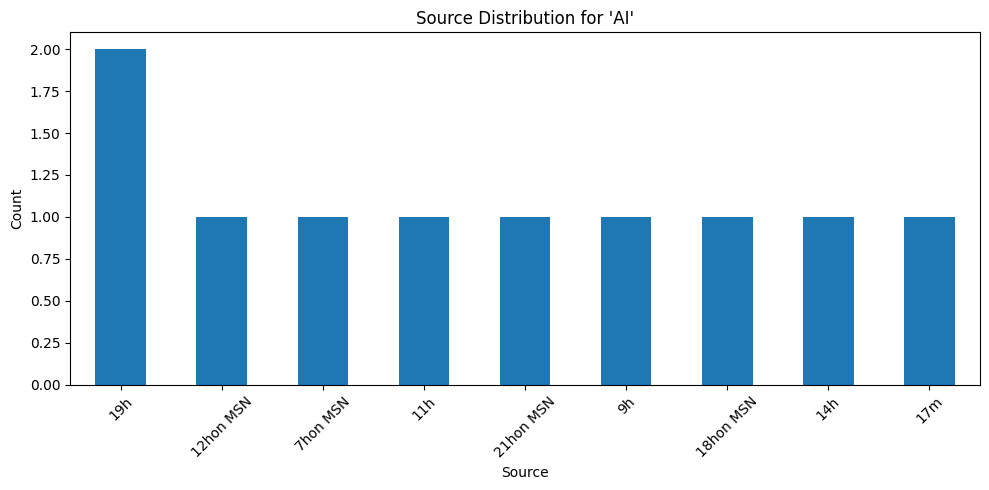

In [ ]:
plt.figure(figsize=(10,5))
df['Source'].value_counts().plot(kind='bar')
plt.title(f"Source Distribution for '{keyword}'")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from openai import OpenAI


In [ ]:
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')


In [ ]:
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)


In [ ]:
def summarize_news(df):
    text = "\n".join(df['Title'].tolist())
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "Summarize these news headlines in a few bullet points."},
            {"role": "user", "content": text}
        ]
    )
    return response.choices[0].message.content

summary = summarize_news(df)
print(" AI-Generated Summary:\n", summary)


 AI-Generated Summary:
 - Big tech companies are heavily investing in AI, which is being well-received by investors.
- Delta airlines is considering an AI-powered dynamic pricing plan.
- A software engineer argues that despite losing jobs, AI isn't necessarily the problem.
- Startup Trunk Tools is leveraging AI to minimize construction errors and waste.
- Open-source AI has become a national priority in the United States.
- Companies are striving to create intelligent customer experiences using AI.
- Wall Street is showing strong earnings and gains from AI despite ongoing tariff issues.
- UBS suggests that the impact of the AI revolution is at least 3 years away for consumer firms.
- Highlighting the need for exceptional engineering in the age of AI.
- Google plans to use AI to estimate people's ages based on their search history.
